In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.fft import rfft, rfftfreq, irfft

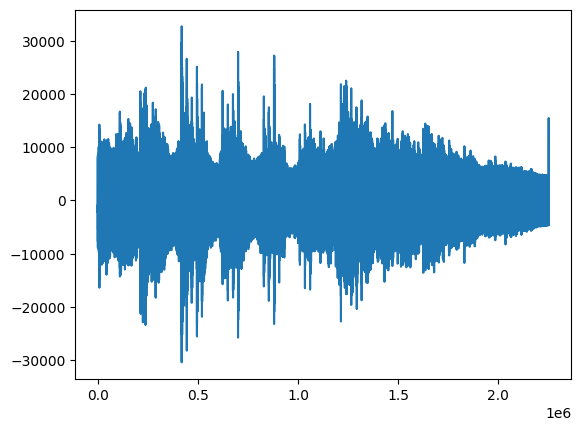

In [3]:
sample_rate, noisy_wave = wavfile.read(r'C:\Users\hi\Desktop\project-files\noisy_tlou.wav')

normalized_tone = np.int16((noisy_wave / noisy_wave.max()) * 32767)

plt.plot(normalized_tone)
plt.show()

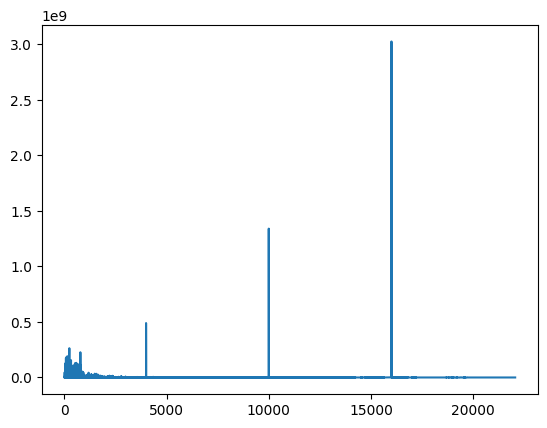

In [4]:
N = len(normalized_tone)

yf = rfft(normalized_tone)
xf = rfftfreq(N, 1 / sample_rate)

plt.plot(xf, np.abs(yf))
plt.show()

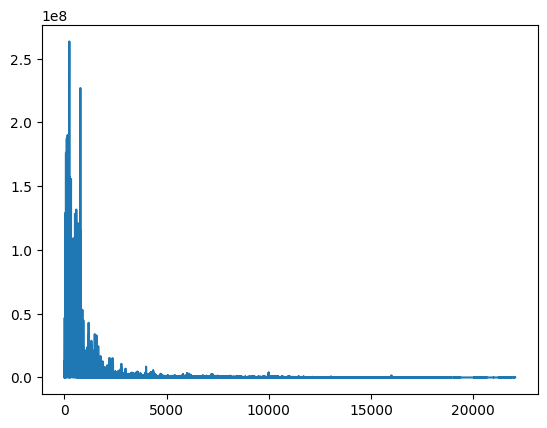

In [5]:
points_per_freq = len(xf) / (sample_rate / 2)

target_idx_1 = int(points_per_freq * 4000)
target_idx_2 = int(points_per_freq * 10000)
target_idx_3 = int(points_per_freq * 16000)

yf[target_idx_1 - 30 : target_idx_1 + 30] = 0
yf[target_idx_2 - 100 : target_idx_2 + 100] = 0
yf[target_idx_3 - 60 : target_idx_3 + 60] = 0

plt.plot(xf, np.abs(yf))
plt.show()

In [6]:
fast_wave = 2 * yf
x_fast = rfftfreq(N, 1 / (2 * sample_rate))

slow_wave = 0.5 * yf
x_slow = rfftfreq(N, 1 / (0.5 * sample_rate))

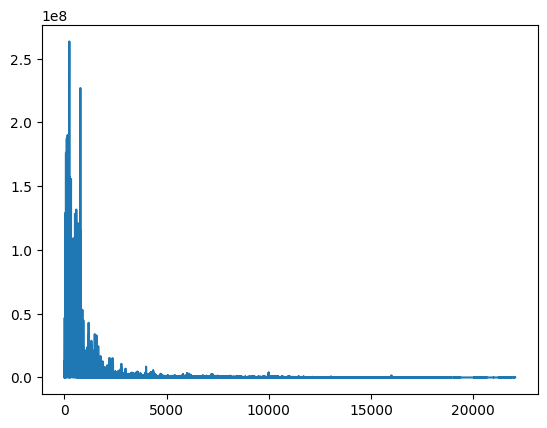

In [8]:
plt.plot(xf, np.abs(yf))
plt.show()

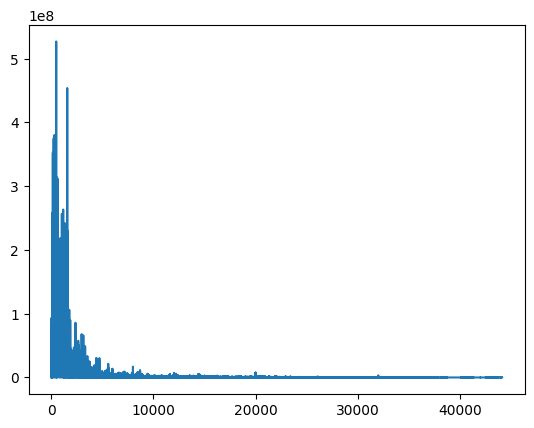

In [9]:
plt.plot(x_fast, np.abs(fast_wave))
plt.show()

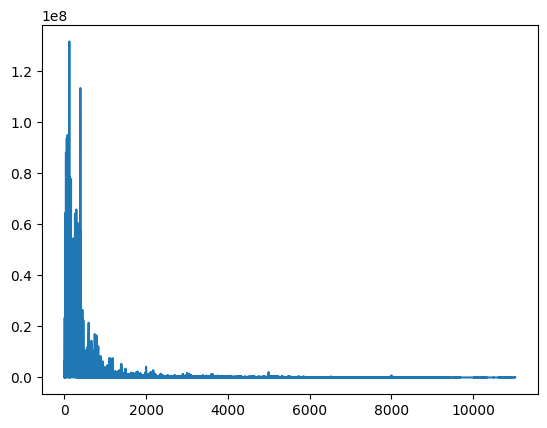

In [10]:
plt.plot(x_slow, np.abs(slow_wave))
plt.show()

In [11]:
clean_wave = irfft(yf)
fast_wave = irfft(fast_wave)
slow_wave = irfft(slow_wave)

normalized_clean_wave = np.int16(clean_wave * (32767 / clean_wave.max()))
normalized_fast_wave = np.int16(fast_wave * (32767 / fast_wave.max()))
normalized_slow_wave = np.int16(slow_wave * (32767 / slow_wave.max()))

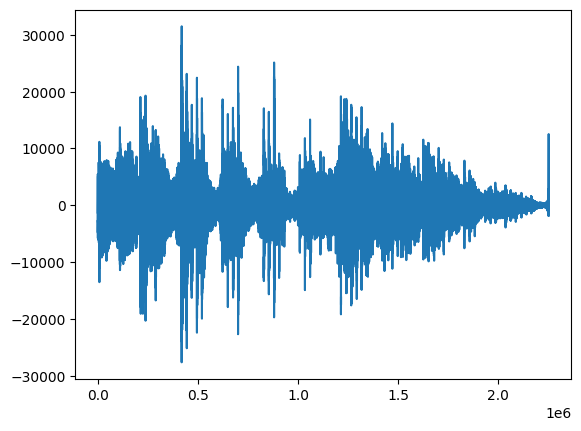

In [12]:
plt.plot(clean_wave)
plt.show()

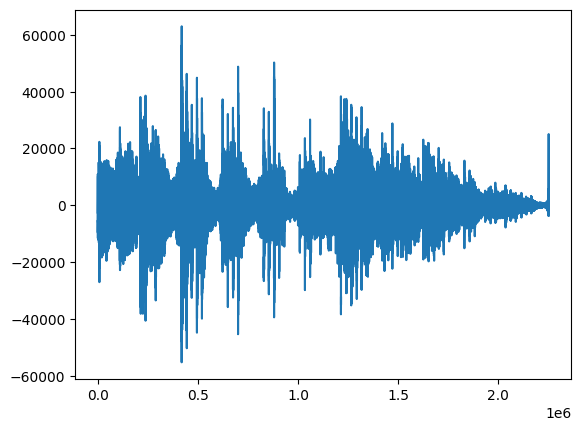

In [14]:
plt.plot(fast_wave)
plt.show()

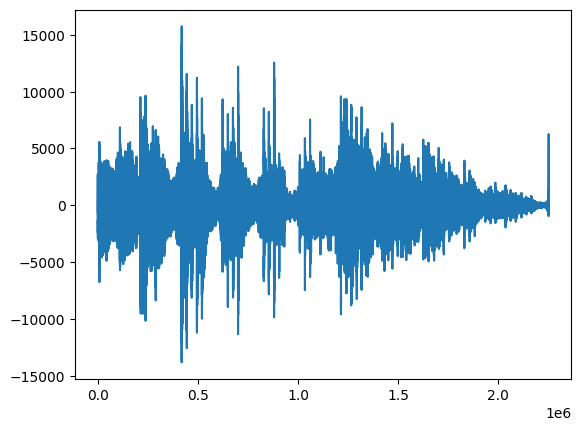

In [13]:
plt.plot(slow_wave)
plt.show()

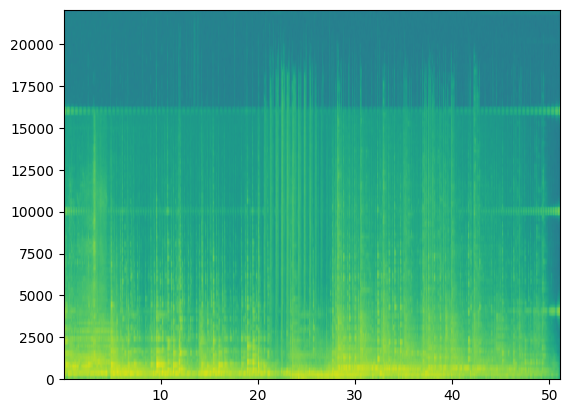

In [14]:
plt.specgram(clean_wave, Fs=sample_rate)
plt.show()

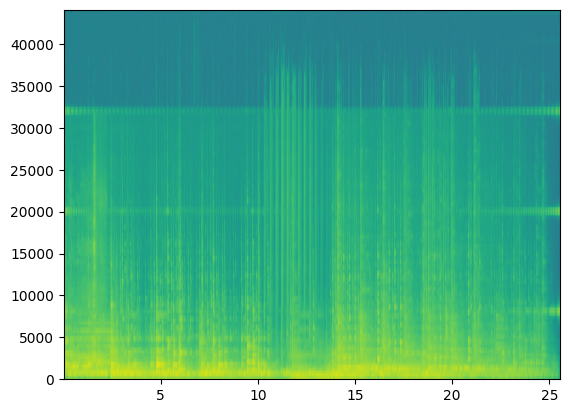

In [15]:
plt.specgram(fast_wave, Fs=2*sample_rate)
plt.show()

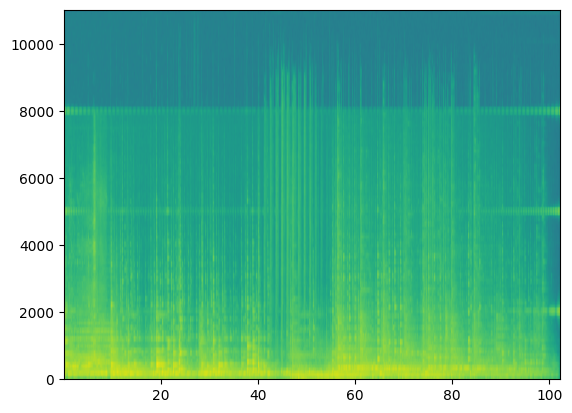

In [16]:
plt.specgram(slow_wave, Fs=0.5*sample_rate)
plt.show()

In [17]:
wavfile.write(r'C:\Users\hi\Desktop\clean.wav', sample_rate, normalized_clean_wave)

wavfile.write(r'C:\Users\hi\Desktop\fast.wav', 2 * sample_rate, normalized_fast_wave)

wavfile.write(r'C:\Users\hi\Desktop\slow.wav', int(0.5 * sample_rate), normalized_slow_wave)